In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matminer.featurizers.composition import ElementFraction
from pymatgen.core.composition import Composition



In [6]:
# Load datasets
main_data = pd.read_csv("mp_is_metal.csv")
aux_data = pd.read_csv("mp_gap.csv")

# Feature extraction using ElementFraction
def featurize_formula(formula):
    try:
        return ElementFraction().featurize(Composition(formula))
    except:
        return None  # Handle errors gracefully

main_data['features'] = main_data['formula'].apply(featurize_formula)
aux_data['features'] = aux_data['formula'].apply(featurize_formula)



In [7]:
# Drop any rows where featurization failed
main_data = main_data.dropna(subset=['features'])
aux_data = aux_data.dropna(subset=['features'])



In [8]:
# Convert lists to DataFrame
X_main = pd.DataFrame(main_data['features'].tolist())
X_aux = pd.DataFrame(aux_data['features'].tolist())



In [9]:
# Labels
y_main = main_data['target'].values
y_aux = aux_data['target'].values

# Split into train and test
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_main, y_main, test_size=0.2, random_state=42)
X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(X_aux, y_aux, test_size=0.2, random_state=42)



In [10]:
# Normalize features
scaler = StandardScaler()
X_train_main = scaler.fit_transform(X_train_main)
X_test_main = scaler.transform(X_test_main)
X_train_aux = scaler.fit_transform(X_train_aux)
X_test_aux = scaler.transform(X_test_aux)



In [11]:
# Define a function to build a simple NN
def build_nn(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [12]:
# Train Baseline NN
baseline_nn = build_nn(X_train_main.shape[1])
baseline_nn.fit(X_train_main, y_train_main, epochs=50, validation_data=(X_test_main, y_test_main), batch_size=32, verbose=1)



Epoch 1/50


/home/sachin.rangaswam/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2653/2653 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8015 - loss: 0.4364 - val_accuracy: 0.8623 - val_loss: 0.3343
Epoch 2/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8497 - loss: 0.3610 - val_accuracy: 0.8670 - val_loss: 0.3221
Epoch 3/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8554 - loss: 0.3474 - val_accuracy: 0.8680 - val_loss: 0.3177
Epoch 4/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8615 - loss: 0.3374 - val_accuracy: 0.8726 - val_loss: 0.3142
Epoch 5/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8645 - loss: 0.3315 - val_accuracy: 0.8739 - val_loss: 0.3087
Epoch 6/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8666 - loss: 0.3275 - val_accuracy: 0.8733 - val_loss: 0.3074
Epoch 7/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8666 - loss: 0.3256 - val_accuracy: 0.8757 - val_loss: 0.3058
Epoch 8/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8700 - loss: 0.3182 - val_accurac

In [13]:
# Train Auxiliary NN
aux_nn = build_nn(X_train_aux.shape[1])
aux_nn.fit(X_train_aux, y_train_aux, epochs=50, validation_data=(X_test_aux, y_test_aux), batch_size=32, verbose=1)



Epoch 1/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2557 - loss: -11730.9854 - val_accuracy: 0.1633 - val_loss: -154685.8750
Epoch 2/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1811 - loss: -292517.1562 - val_accuracy: 0.2085 - val_loss: -883946.1250
Epoch 3/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1761 - loss: -1194792.7500 - val_accuracy: 0.1868 - val_loss: -2397641.7500
Epoch 4/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1556 - loss: -2877372.5000 - val_accuracy: 0.1630 - val_loss: -4854850.0000
Epoch 5/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1456 - loss: -5542776.0000 - val_accuracy: 0.1450 - val_loss: -8501589.0000
Epoch 6/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1561 - loss: -9333384.0000 - val_accuracy: 0.2142 - val_loss: -13956695.0000
Epoch 7/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1544 - loss: -14491425.0000 - val_accuracy: 0.1529 - val_loss: -20980968

In [14]:
# Transfer Learning
transferred_nn = build_nn(X_train_main.shape[1])
for i, layer in enumerate(aux_nn.layers[:-1]):
    transferred_nn.layers[i].set_weights(layer.get_weights())
    transferred_nn.layers[i].trainable = False  # Freeze pretrained layers

transferred_nn.fit(X_train_main, y_train_main, epochs=50, validation_data=(X_test_main, y_test_main), batch_size=32, verbose=1)



Epoch 1/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6179 - loss: 113271.6172 - val_accuracy: 0.7386 - val_loss: 899.9138
Epoch 2/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7069 - loss: 791.6354 - val_accuracy: 0.7330 - val_loss: 420.4332
Epoch 3/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7067 - loss: 821.5216 - val_accuracy: 0.7387 - val_loss: 2225.0056
Epoch 4/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7074 - loss: 983.9980 - val_accuracy: 0.7300 - val_loss: 540.2094
Epoch 5/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7097 - loss: 808.9620 - val_accuracy: 0.7158 - val_loss: 328.9554
Epoch 6/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7055 - loss: 889.5162 - val_accuracy: 0.7404 - val_loss: 791.9193
Epoch 7/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7094 - loss: 849.0275 - val_accuracy: 0.7384 - val_loss: 288.1361
Epoch 8/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - ac

In [15]:
# Compare results
baseline_acc = baseline_nn.evaluate(X_test_main, y_test_main)[1]
transferred_acc = transferred_nn.evaluate(X_test_main, y_test_main)[1]
print(f"Baseline Accuracy: {baseline_acc:.4f}")
print(f"Transferred Accuracy: {transferred_acc:.4f}")

664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.8844 - loss: 0.2807
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.4294 - loss: 2042.0557
Baseline Accuracy: 0.8860
Transferred Accuracy: 0.4326


Oopsy!

In [16]:
print("Main dataset class distribution:\n", main_data['target'].value_counts(normalize=True))
print("\nAuxiliary dataset class distribution:\n", aux_data['target'].value_counts(normalize=True))


Main dataset class distribution:
 target
0.0    0.565077
1.0    0.434923
Name: proportion, dtype: float64

Auxiliary dataset class distribution:
 target
0.0000    0.434923
0.0080    0.000132
0.0001    0.000113
0.0068    0.000104
0.0057    0.000104
            ...   
4.5955    0.000009
4.4475    0.000009
3.2023    0.000009
2.1525    0.000009
1.1335    0.000009
Name: proportion, Length: 44092, dtype: float64


In [17]:
print("Main dataset feature stats:\n", X_main.describe())
print("\nAuxiliary dataset feature stats:\n", X_aux.describe())


Main dataset feature stats:
                  0         1              2              3              4    \
count  106113.000000  106113.0  106113.000000  106113.000000  106113.000000   
mean        0.025773       0.0       0.032722       0.002222       0.012903   
std         0.105628       0.0       0.088404       0.034254       0.071021   
min         0.000000       0.0       0.000000       0.000000       0.000000   
25%         0.000000       0.0       0.000000       0.000000       0.000000   
50%         0.000000       0.0       0.000000       0.000000       0.000000   
75%         0.000000       0.0       0.000000       0.000000       0.000000   
max         1.000000       0.0       1.000000       1.000000       1.000000   

                 5              6              7              8         9    \
count  106113.000000  106113.000000  106113.000000  106113.000000  106113.0   
mean        0.009617       0.011568       0.265857       0.039304       0.0   
std         0.053571  

In [18]:


# Convert auxiliary dataset labels to binary
aux_data['target'] = (aux_data['target'] > 0.5).astype(int)



In [19]:
# Feature extraction using ElementFraction
def featurize_formula(formula):
    try:
        return ElementFraction().featurize(Composition(formula))
    except:
        return None  # Handle errors gracefully



In [20]:
main_data['features'] = main_data['formula'].apply(featurize_formula)
aux_data['features'] = aux_data['formula'].apply(featurize_formula)

# Drop any rows where featurization failed
main_data = main_data.dropna(subset=['features'])
aux_data = aux_data.dropna(subset=['features'])



In [21]:
# Convert lists to DataFrame
X_main = pd.DataFrame(main_data['features'].tolist())
X_aux = pd.DataFrame(aux_data['features'].tolist())

# Labels
y_main = main_data['target'].values
y_aux = aux_data['target'].values



In [22]:
# Split into train and test
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_main, y_main, test_size=0.2, random_state=42)
X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(X_aux, y_aux, test_size=0.2, random_state=42)



In [23]:
# Normalize features using the same scaler
scaler = StandardScaler()
scaler.fit(X_train_aux)  # Fit on the auxiliary dataset first
X_train_aux = scaler.transform(X_train_aux)
X_test_aux = scaler.transform(X_test_aux)
X_train_main = scaler.transform(X_train_main)
X_test_main = scaler.transform(X_test_main)



In [24]:
# Define a function to build a simple NN
def build_nn(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model




In [26]:
from tensorflow.keras.optimizers import Adam
# Train Baseline NN
baseline_nn = build_nn(X_train_main.shape[1])
baseline_nn.fit(X_train_main, y_train_main, epochs=50, validation_data=(X_test_main, y_test_main), batch_size=32, verbose=1)



Epoch 1/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7976 - loss: 0.4549 - val_accuracy: 0.8609 - val_loss: 0.3344
Epoch 2/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8502 - loss: 0.3593 - val_accuracy: 0.8668 - val_loss: 0.3224
Epoch 3/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8596 - loss: 0.3415 - val_accuracy: 0.8676 - val_loss: 0.3179
Epoch 4/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8619 - loss: 0.3374 - val_accuracy: 0.8724 - val_loss: 0.3119
Epoch 5/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8649 - loss: 0.3314 - val_accuracy: 0.8724 - val_loss: 0.3105
Epoch 6/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8677 - loss: 0.3283 - val_accuracy: 0.8752 - val_loss: 0.3062
Epoch 7/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8702 - loss: 0.3244 - val_accuracy: 0.8780 - val_loss: 0.3014
Epoch 8/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8713 - loss: 0.3195 - 

In [27]:
# Train Auxiliary NN
aux_nn = build_nn(X_train_aux.shape[1])
aux_nn.fit(X_train_aux, y_train_aux, epochs=50, validation_data=(X_test_aux, y_test_aux), batch_size=32, verbose=1)


Epoch 1/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7816 - loss: 0.4540 - val_accuracy: 0.8527 - val_loss: 0.3389
Epoch 2/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8362 - loss: 0.3632 - val_accuracy: 0.8601 - val_loss: 0.3215
Epoch 3/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8455 - loss: 0.3462 - val_accuracy: 0.8643 - val_loss: 0.3128
Epoch 4/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8497 - loss: 0.3365 - val_accuracy: 0.8689 - val_loss: 0.3029
Epoch 5/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8525 - loss: 0.3286 - val_accuracy: 0.8689 - val_loss: 0.2979
Epoch 6/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8558 - loss: 0.3242 - val_accuracy: 0.8707 - val_loss: 0.2951
Epoch 7/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8570 - loss: 0.3223 - val_accuracy: 0.8736 - val_loss: 0.2915
Epoch 8/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8615 - loss: 0.3129 - 

In [28]:
# Transfer Learning
transferred_nn = build_nn(X_train_main.shape[1])
for i, layer in enumerate(aux_nn.layers[:-3]):  # Unfreeze last 3 layers for fine-tuning
    transferred_nn.layers[i].set_weights(layer.get_weights())
    transferred_nn.layers[i].trainable = False  # Keep early layers frozen



In [29]:
# Fine-tune transferred model
transferred_nn.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
transferred_nn.fit(X_train_main, y_train_main, epochs=100, validation_data=(X_test_main, y_test_main), batch_size=32, verbose=1)



Epoch 1/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8202 - loss: 0.4010 - val_accuracy: 0.8706 - val_loss: 0.3026
Epoch 2/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8691 - loss: 0.3160 - val_accuracy: 0.8727 - val_loss: 0.2974
Epoch 3/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8738 - loss: 0.3063 - val_accuracy: 0.8754 - val_loss: 0.2942
Epoch 4/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8722 - loss: 0.3087 - val_accuracy: 0.8755 - val_loss: 0.2927
Epoch 5/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8733 - loss: 0.3041 - val_accuracy: 0.8761 - val_loss: 0.2915
Epoch 6/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8737 - loss: 0.3047 - val_accuracy: 0.8763 - val_loss: 0.2910
Epoch 7/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8741 - loss: 0.3016 - val_accuracy: 0.8765 - val_loss: 0.2903
Epoch 8/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8755 - loss: 0

In [30]:
# Compare results
baseline_acc = baseline_nn.evaluate(X_test_main, y_test_main)[1]
transferred_acc = transferred_nn.evaluate(X_test_main, y_test_main)[1]
print(f"Baseline Accuracy: {baseline_acc:.4f}")
print(f"Transferred Accuracy: {transferred_acc:.4f}")

664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.8834 - loss: 0.2848
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.8837 - loss: 0.2851
Baseline Accuracy: 0.8842
Transferred Accuracy: 0.8822


In [34]:
baseline_history = baseline_nn.fit(X_train_main, y_train_main, epochs=50, validation_data=(X_test_main, y_test_main), batch_size=32, verbose=1)


Epoch 1/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8859 - loss: 0.2847 - val_accuracy: 0.8844 - val_loss: 0.2815
Epoch 2/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8876 - loss: 0.2781 - val_accuracy: 0.8840 - val_loss: 0.2832
Epoch 3/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8844 - loss: 0.2836 - val_accuracy: 0.8854 - val_loss: 0.2805
Epoch 4/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8847 - loss: 0.2843 - val_accuracy: 0.8841 - val_loss: 0.2820
Epoch 5/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8826 - loss: 0.2872 - val_accuracy: 0.8844 - val_loss: 0.2804
Epoch 6/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8844 - loss: 0.2839 - val_accuracy: 0.8857 - val_loss: 0.2782
Epoch 7/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8822 - loss: 0.2864 - val_accuracy: 0.8835 - val_loss: 0.2818
Epoch 8/50
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8852 - loss: 0.2839 - 

In [38]:
transferred_history = transferred_nn.fit(X_train_main, y_train_main, epochs=100, validation_data=(X_test_main, y_test_main), batch_size=32, verbose=1)

Epoch 1/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8802 - loss: 0.2882 - val_accuracy: 0.8825 - val_loss: 0.2831
Epoch 2/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8792 - loss: 0.2900 - val_accuracy: 0.8825 - val_loss: 0.2830
Epoch 3/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8810 - loss: 0.2890 - val_accuracy: 0.8824 - val_loss: 0.2833
Epoch 4/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8800 - loss: 0.2889 - val_accuracy: 0.8823 - val_loss: 0.2829
Epoch 5/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8807 - loss: 0.2891 - val_accuracy: 0.8823 - val_loss: 0.2828
Epoch 6/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8780 - loss: 0.2907 - val_accuracy: 0.8827 - val_loss: 0.2830
Epoch 7/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8791 - loss: 0.2895 - val_accuracy: 0.8823 - val_loss: 0.2832
Epoch 8/100
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8776 - loss: 0

In [41]:
from sklearn.metrics import classification_report, confusion_matrix


In [3]:

# Confusion Matrix & Classification Report
def evaluate_model(model, X_test, y_test, title):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nClassification Report for {title}:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Metal', 'Metal'], yticklabels=['Non-Metal', 'Metal'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

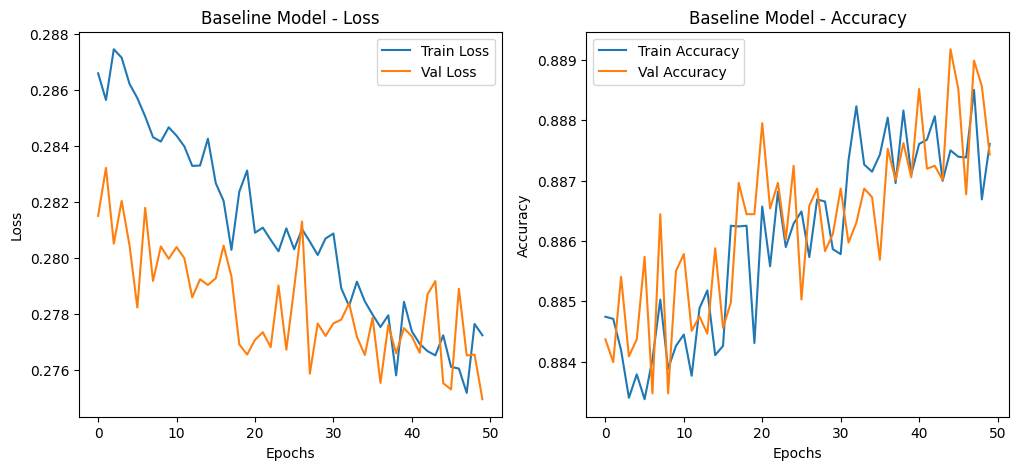

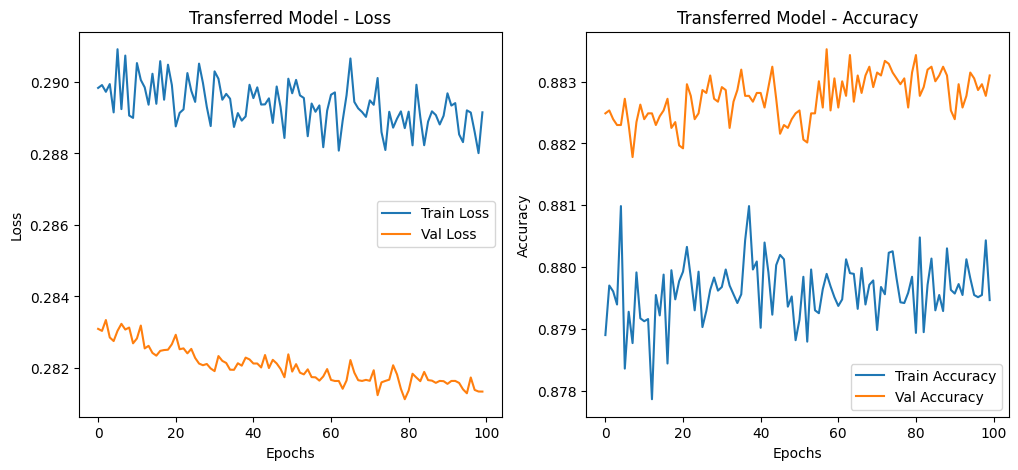

In [40]:
plot_training_history(baseline_history, 'Baseline Model')
plot_training_history(transferred_history, 'Transferred Model')